In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,384 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and dire

# DT 회귀모델 실습

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

### 데이터 불러오기

In [9]:
# 1. 바로 불러오기 -> 넘파이 배열로 생성되어 있음
X_reg, y_reg = fetch_california_housing(return_X_y=True)

In [6]:
'''
위와 같은 코드
dt = fetch_california_housing(return_X_y=True)
X_reg = dt.data
y_reg = dt.target
'''

'\n위와 같은 코드\ndt = fetch_california_housing(return_X_y=True)\nX_reg = dt.data\ny_reg = dt.target\n'

In [7]:
# 판다스 형식으로 데이터 보기
# 데이터 보기 쉽게 하기 위한 코드 - 모델링과는 상관 없음

import pandas as pd
dt = fetch_california_housing()

# dt를 판다스 데이터 프레임으로 변환
df = pd.DataFrame(dt.data, columns=dt.feature_names)
# label = pd.DataFrame(dt.target)

In [8]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [10]:
# 윗 셀로만 데이터 가져왔을때,

# 판다스 -> 넘파이 변환
# 독립변수 (df)
X_reg = df.values

# 종속변수 (dt)
y_reg = dt.target

In [11]:
y_reg

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.4, random_state=42)

In [13]:
# 모델링
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
# 예측 및 평가
y_pred = dt_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print('평균 제곱 오차(MSE): ', mse)

평균 제곱 오차(MSE):  0.5577268819227833


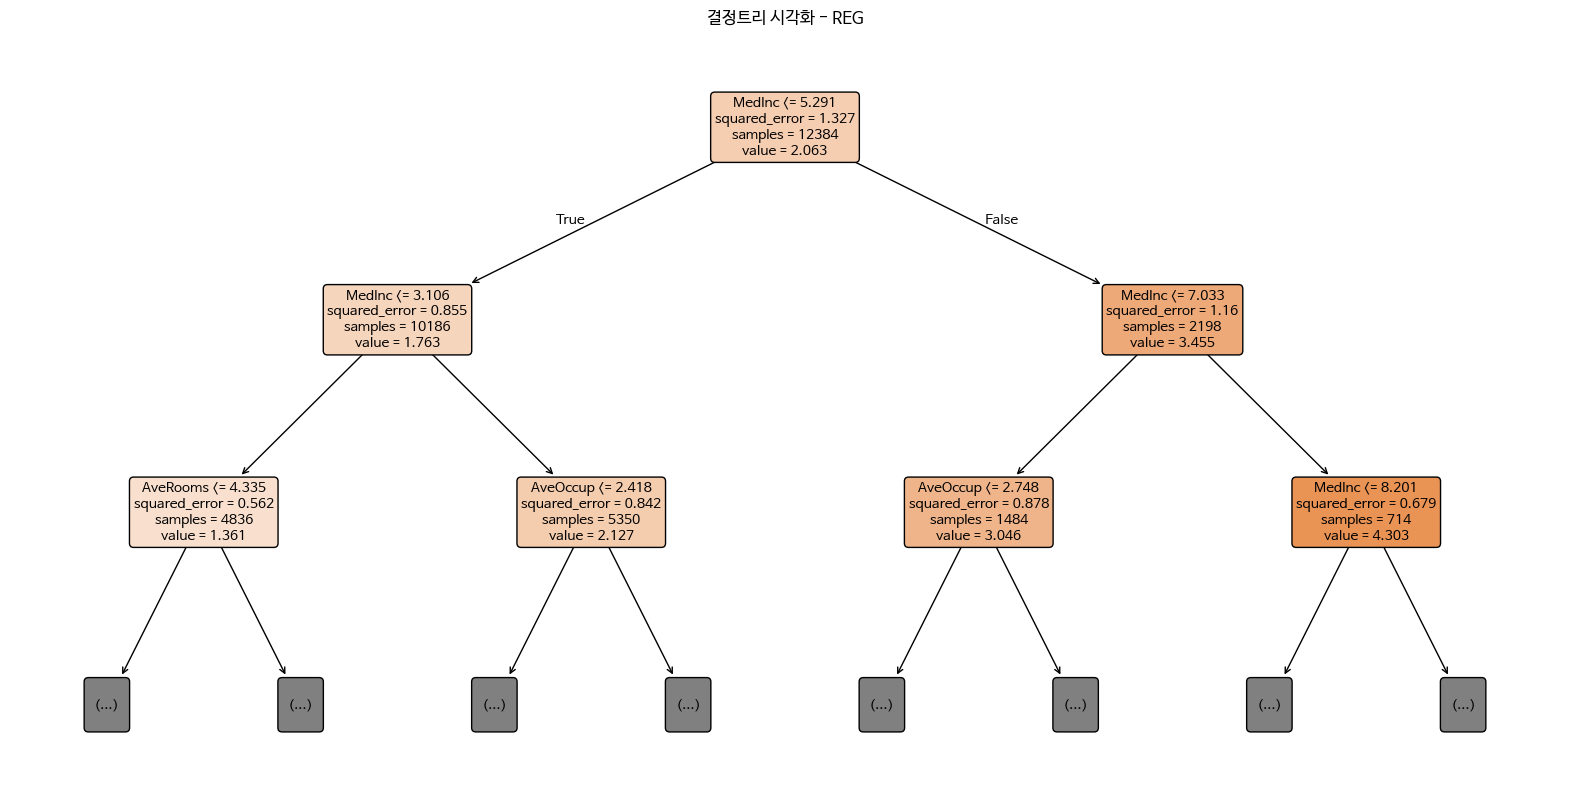

In [20]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

plot_tree(
    dt_reg,
    feature_names=dt.feature_names,
    filled=True, # filled=True -> 트리 안에 노드들의 색을 다 칠해라
    rounded=True,
    max_depth=2, # 트리의 깊이를 2로 제한
    fontsize=10
)

plt.title('결정트리 시각화 - REG')
plt.show()

# DT 분류 모델 코딩

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

In [22]:
iris = load_iris()
X_clf = iris.data
y_clf = iris.target

In [23]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.4, random_state=42)

In [28]:
# 모델링
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf.fit(X_clf, y_clf)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [29]:
# 시각화 준비 - 중요코드 X

feature_names_clf = iris.feature_names
class_names_clf = iris.target_names

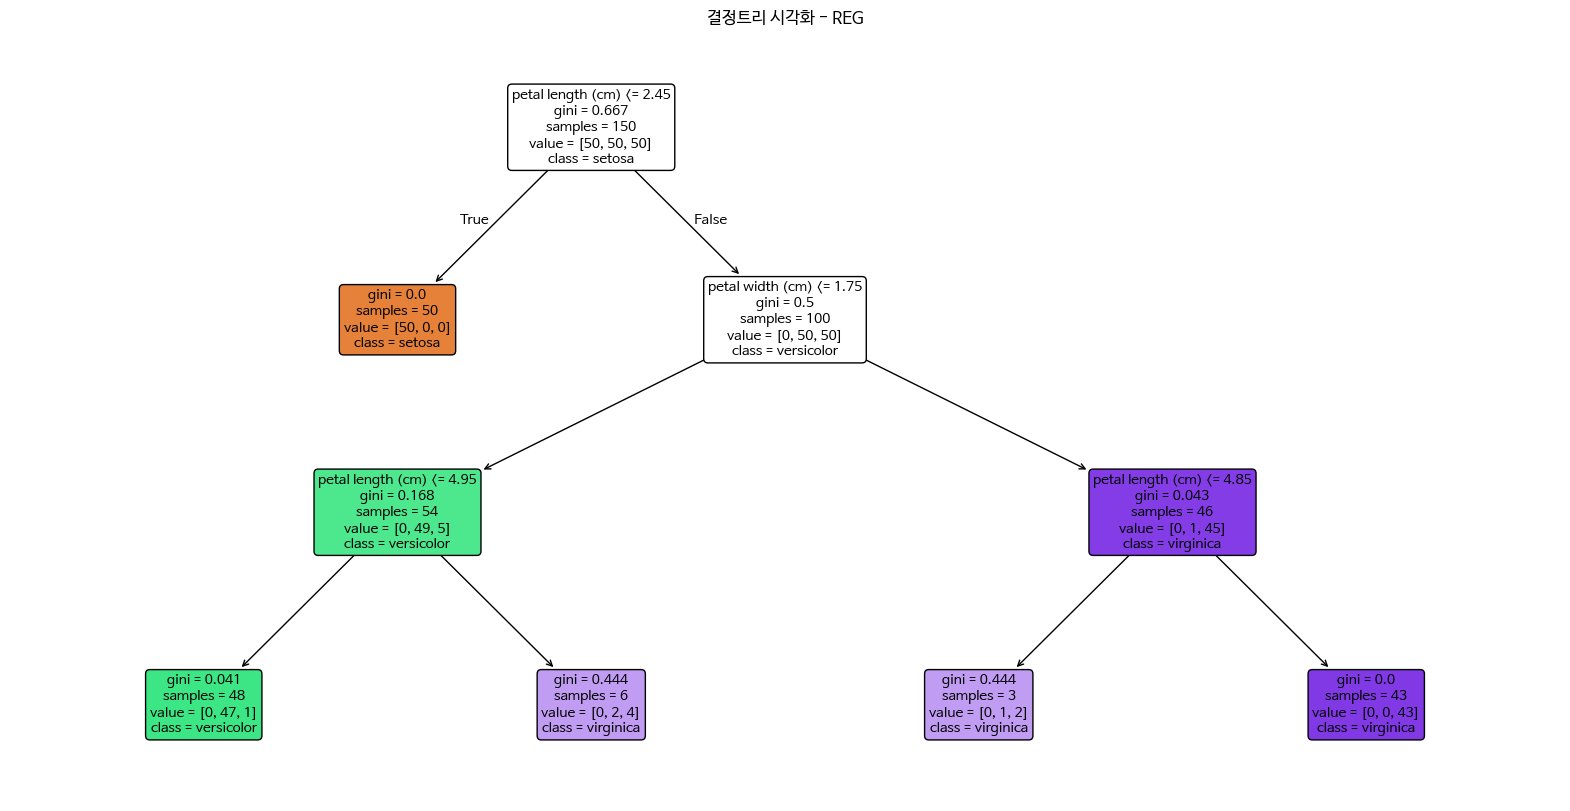

In [31]:
# 시각화
plt.figure(figsize=(20, 10))

plot_tree(
    dt_clf,
    feature_names=feature_names_clf,
    class_names=class_names_clf,
    filled=True, # filled=True -> 트리 안에 노드들의 색을 다 칠해라
    rounded=True,
    impurity= True,
    fontsize=10
)

plt.title('결정트리 시각화 - REG')
plt.show()

# 속성 중요도 코드

In [32]:
# 컬럼 이름 가져오기
feature_names = iris.feature_names

In [36]:
# 학습된 모델의 feature_importances_ 속성에서 각 트것ㅇ의 중요도 값을 가져오기
importances = dt_clf.feature_importances_
importances

array([0.        , 0.        , 0.58561555, 0.41438445])

In [35]:
# 속성 이름과 중요도를 묶어 DF 생성 및 정렬
importance_df = pd.DataFrame(
    {
        'feature': feature_names,
        'importance': importances
    }
)
importance_df = importance_df.sort_values(by='importance', ascending=False)
importance_df

,feature,importance
2,petal length (cm),0.585616
3,petal width (cm),0.414384
1,sepal width (cm),0.000000
0,sepal length (cm),0.000000


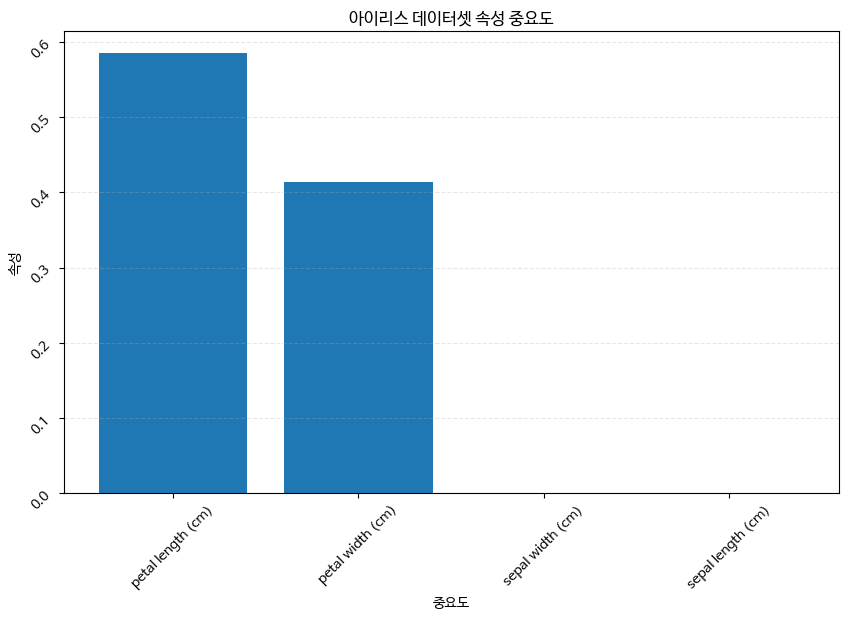

In [47]:
# 중요도 시각화
plt.figure(figsize=(10, 6))

plt.bar(
    importance_df['feature'],
    importance_df['importance']
)

plt.xlabel("중요도")
plt.ylabel("속성")
plt.title("아이리스 데이터셋 속성 중요도")

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

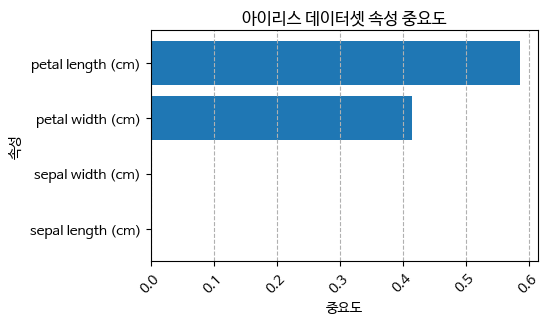

In [54]:
# 중요도 시각화 #2

plt.figure(figsize=(5,3))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel("중요도")
plt.ylabel("속성")
plt.title("아이리스 데이터셋 속성 중요도")
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--')
plt.gca().invert_yaxis()   # 가장 중요한 속성이 위로 옴
plt.show()

# DT 하이퍼 파라미터 조정 코딩
### 사전 가지치기

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [56]:
# Iris 데이터셋 로드 (분류 예시)
iris = load_iris()
X = iris.data  # 특성 데이터
y = iris.target # 타겟 (클래스) 데이터
feature_names = iris.feature_names   # 시각화 위해 준비
class_names = iris.target_names      # 시각화 위해 준비

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# 디시전트리(DT) 아무 제약없는 모델
dtree_model_unconstrained = DecisionTreeClassifier()
dtree_model_unconstrained.fit(X_train, y_train)
print('아무 제약없는 모델 트레이닝 데이터 점수: ', dtree_model_unconstrained.score(X_train, y_train))
print('아무 제약없는 모델 테스트 데이터 점수: ', dtree_model_unconstrained.score(X_test, y_test))

아무 제약없는 모델 트레이닝 데이터 점수:  1.0
아무 제약없는 모델 테스트 데이터 점수:  1.0


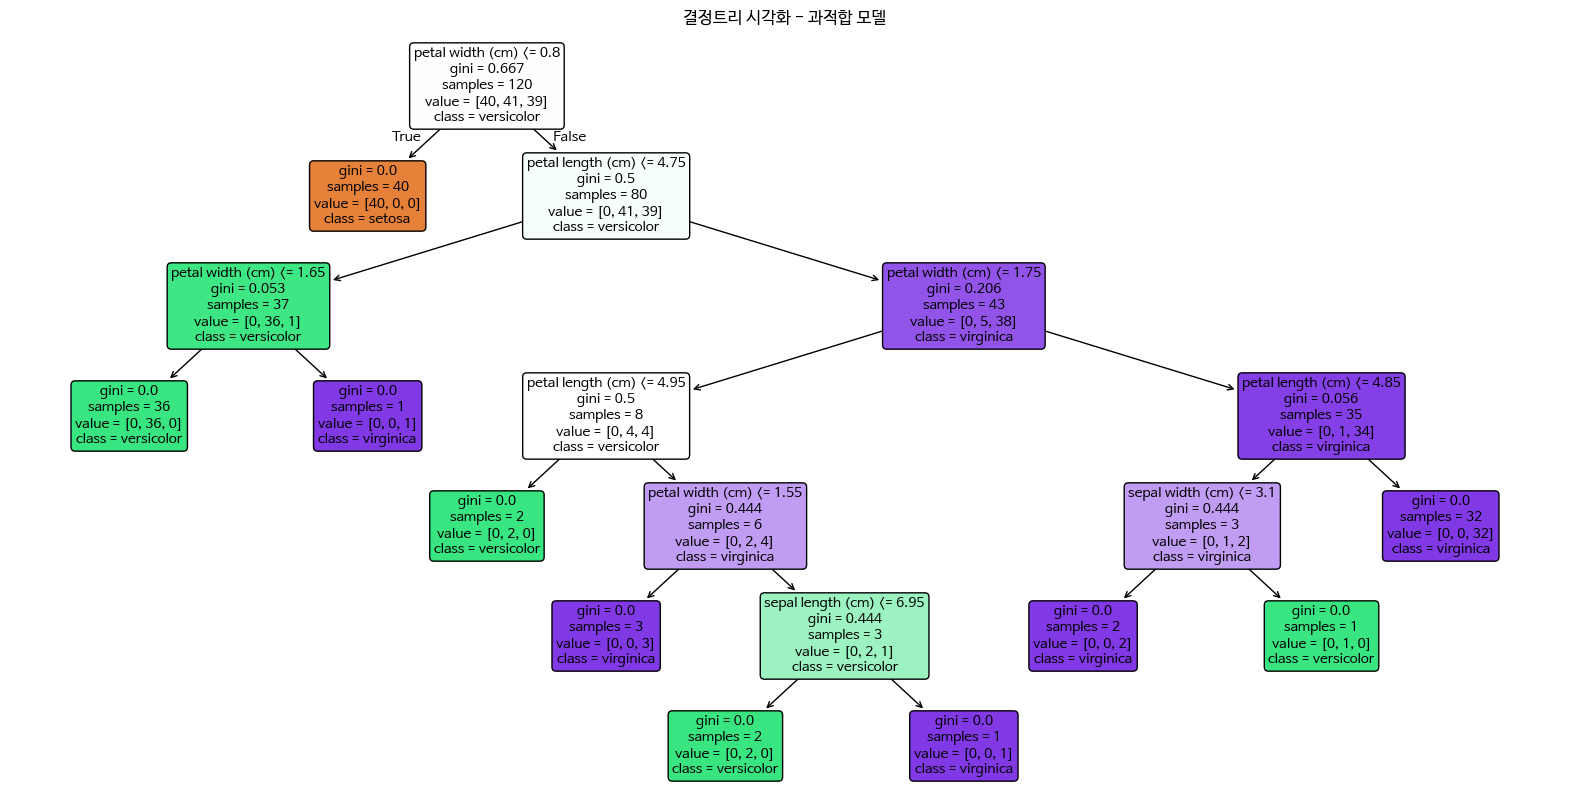

In [65]:
# 시각화
plt.figure(figsize=(20, 10))

plot_tree(
    dtree_model_unconstrained,
    feature_names=feature_names,
    class_names=class_names,
    filled=True, # filled=True -> 트리 안에 노드들의 색을 다 칠해라
    rounded=True,
    impurity= True,
    fontsize=10
)

plt.title('결정트리 시각화 - 과적합 모델')
plt.show()

# 가지치기
## 예시 1. max_depth만 제한

In [63]:
dtree_model_1 = DecisionTreeClassifier(max_depth=3)
dtree_model_1.fit(X_train, y_train)

print('max_depth=3 트레이닝 데이터 점수: ', dtree_model_1.score(X_train, y_train))
print('max_depth=3 테스트 데이터 점수: ', dtree_model_1.score(X_test, y_test))

max_depth=3 트레이닝 데이터 점수:  0.9583333333333334
max_depth=3 테스트 데이터 점수:  1.0


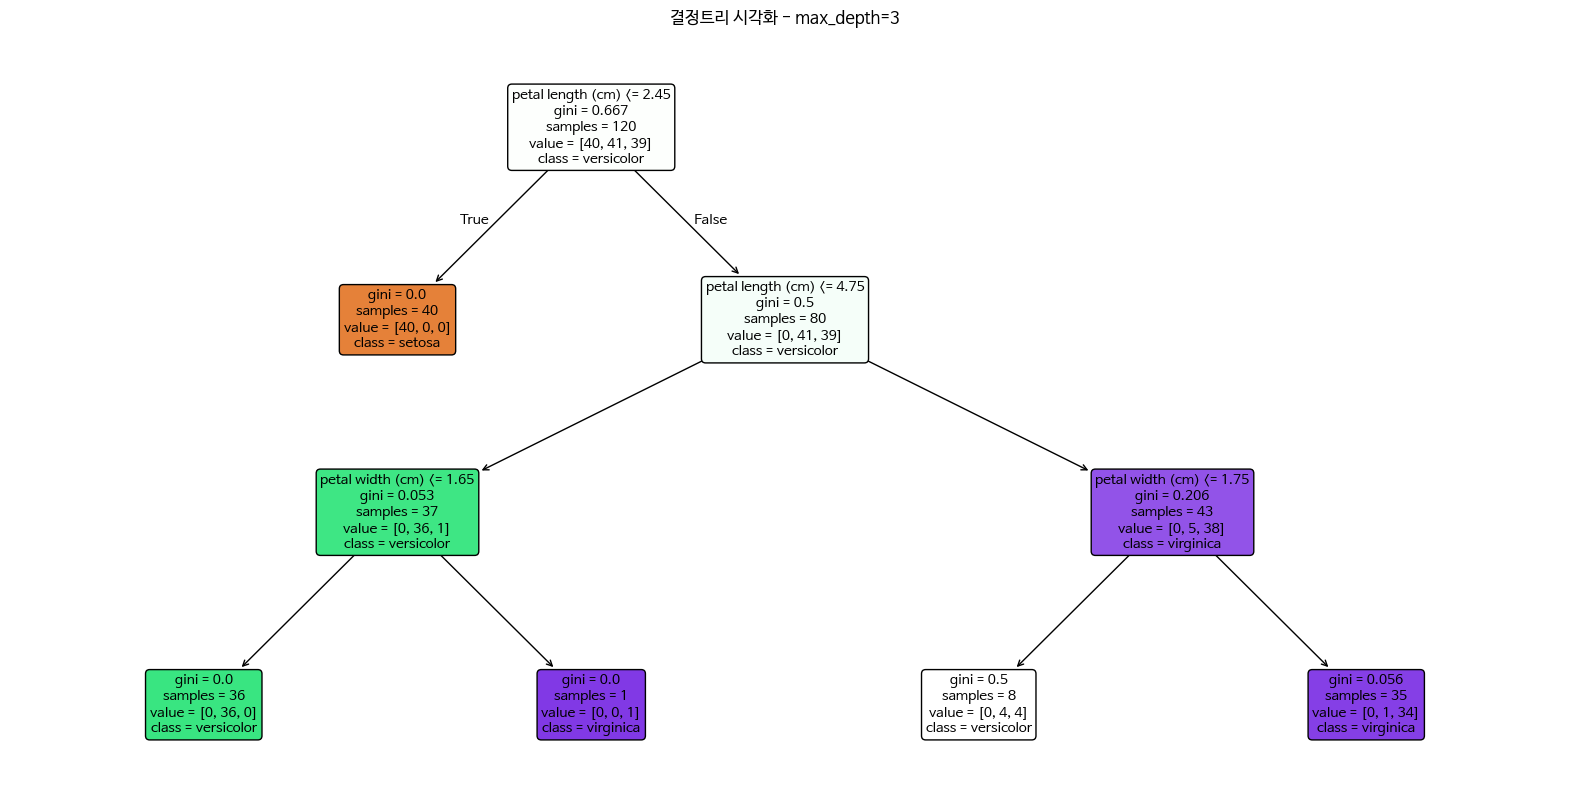

In [67]:
# 시각화
plt.figure(figsize=(20, 10))

plot_tree(
    dtree_model_1,
    feature_names=feature_names,
    class_names=class_names,
    filled=True, # filled=True -> 트리 안에 노드들의 색을 다 칠해라
    rounded=True,
    impurity= True,
    fontsize=10
)

plt.title('결정트리 시각화 - max_depth=3')
plt.show()

## 예시2. 여러 파라미터 제한

In [68]:
dtree_model_2 = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion='entropy'
)
dtree_model_2.fit(X_train, y_train)

print('max_depth=3 트레이닝 데이터 점수: ', dtree_model_2.score(X_train, y_train))
print('max_depth=3 테스트 데이터 점수: ', dtree_model_2.score(X_test, y_test))

max_depth=3 트레이닝 데이터 점수:  0.95
max_depth=3 테스트 데이터 점수:  1.0


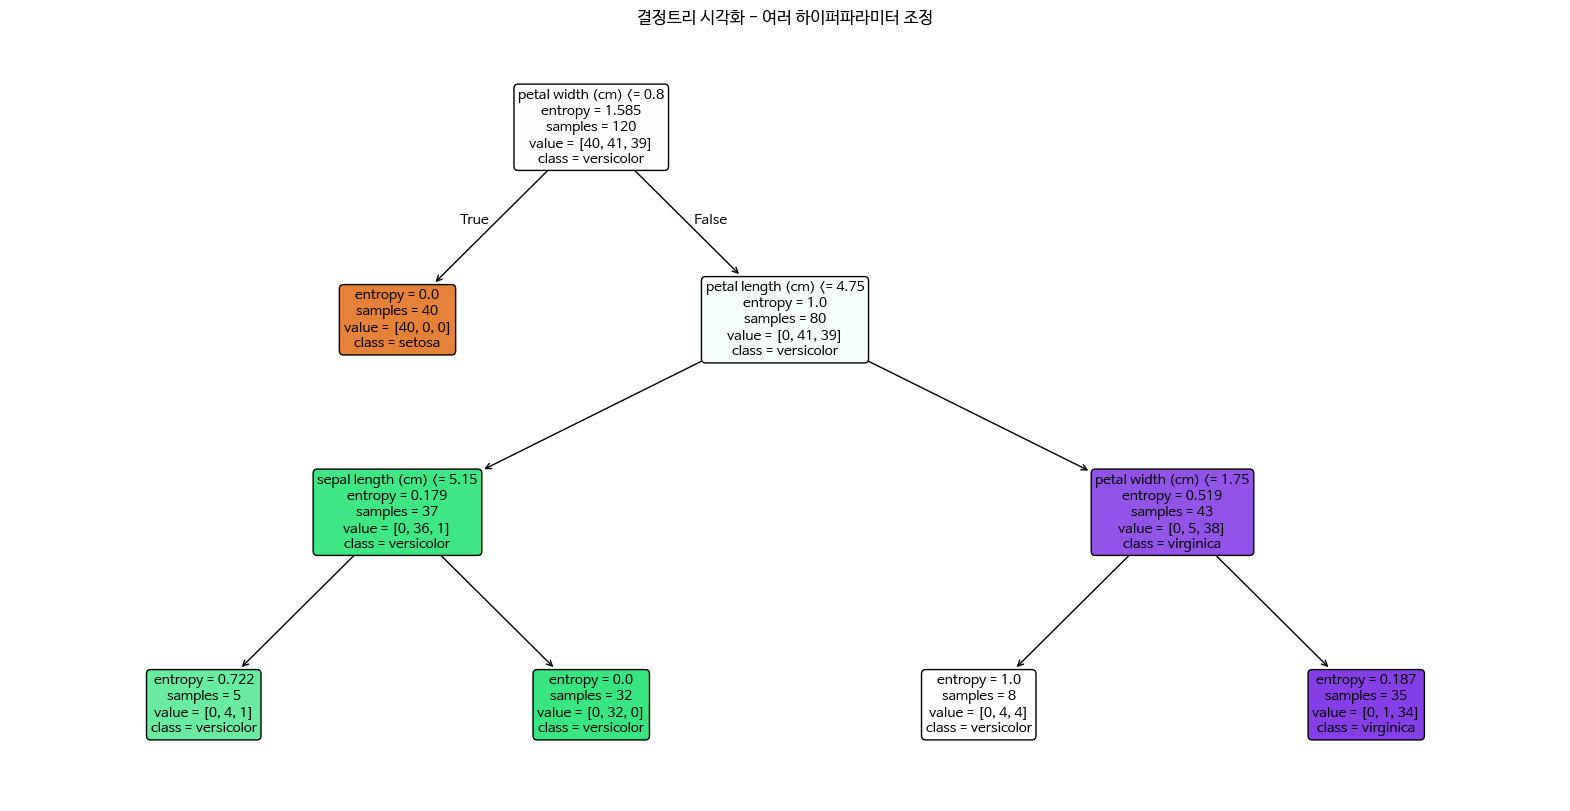

In [69]:
# 시각화
plt.figure(figsize=(20, 10))

plot_tree(
    dtree_model_2,
    feature_names=feature_names,
    class_names=class_names,
    filled=True, # filled=True -> 트리 안에 노드들의 색을 다 칠해라
    rounded=True,
    impurity= True,
    fontsize=10
)

plt.title('결정트리 시각화 - 여러 하이퍼파라미터 조정')
plt.show()